In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\Amit'

In [4]:
path= 'C:\\Users\\Amit\\Downloads\\'

In [6]:
df= pd.read_csv(path+"weatherAUS.csv")

In [7]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [10]:
df.shape

(145460, 23)

In [11]:
df=df.drop(['Date','Evaporation', 'Sunshine','Cloud9am','Cloud3pm','Date'],axis=1)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


# Data Visualization

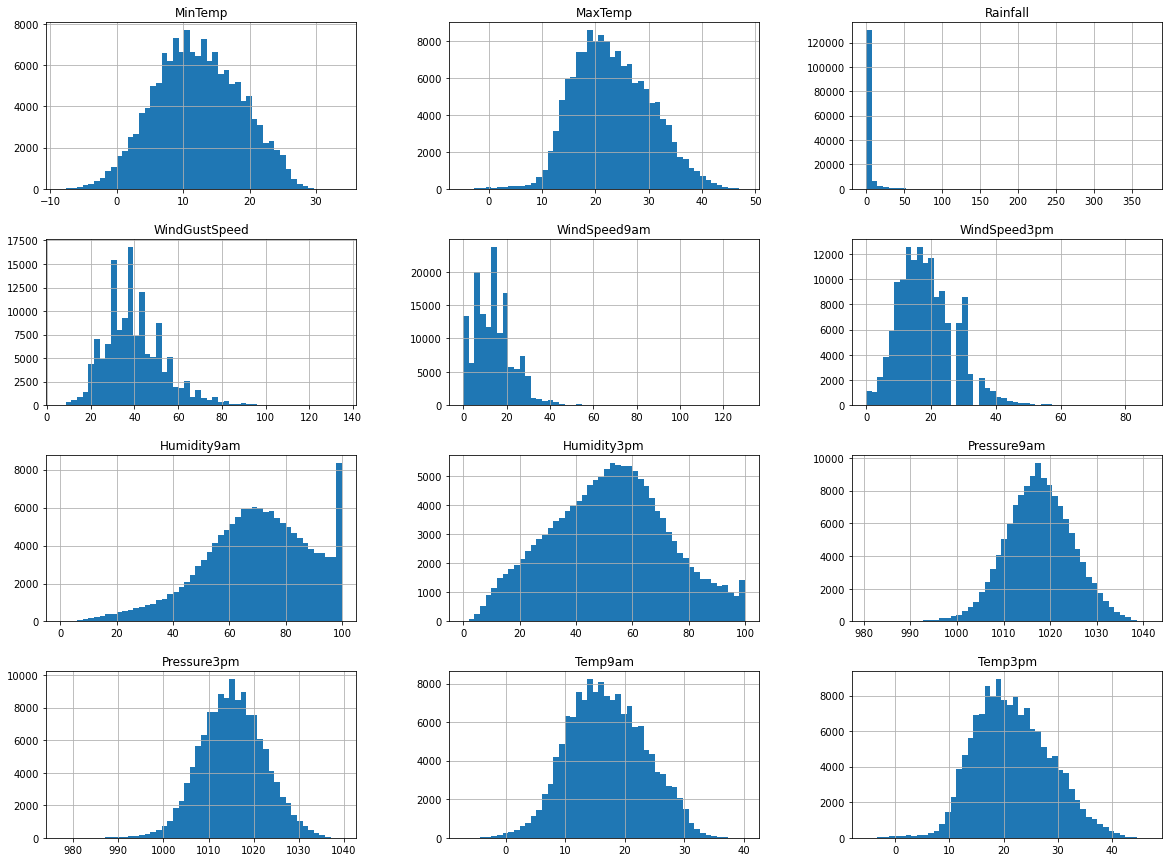

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>

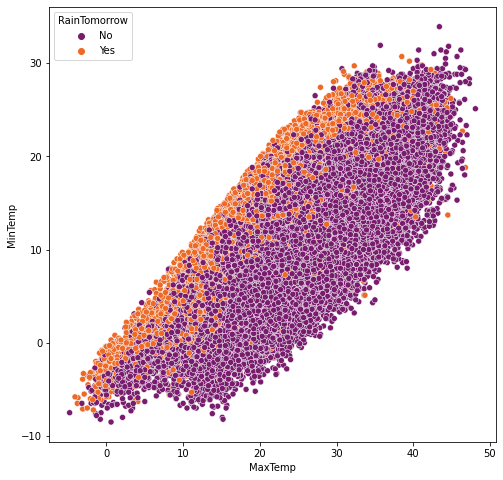

In [13]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='MaxTemp', y='MinTemp', hue='RainTomorrow',palette='inferno', data=df)

<AxesSubplot:xlabel='Humidity9am', ylabel='Temp9am'>

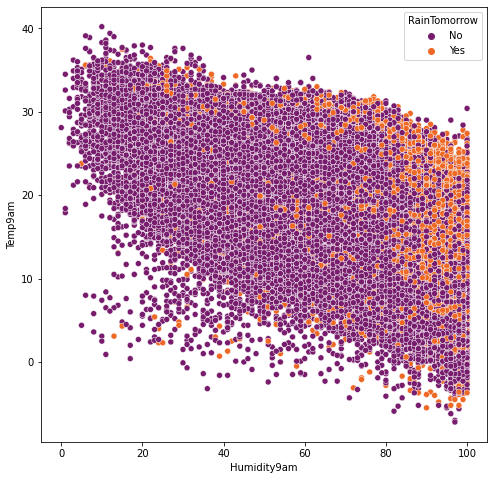

In [14]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Humidity9am', y='Temp9am', hue='RainTomorrow',palette='inferno', data=df)

<AxesSubplot:>

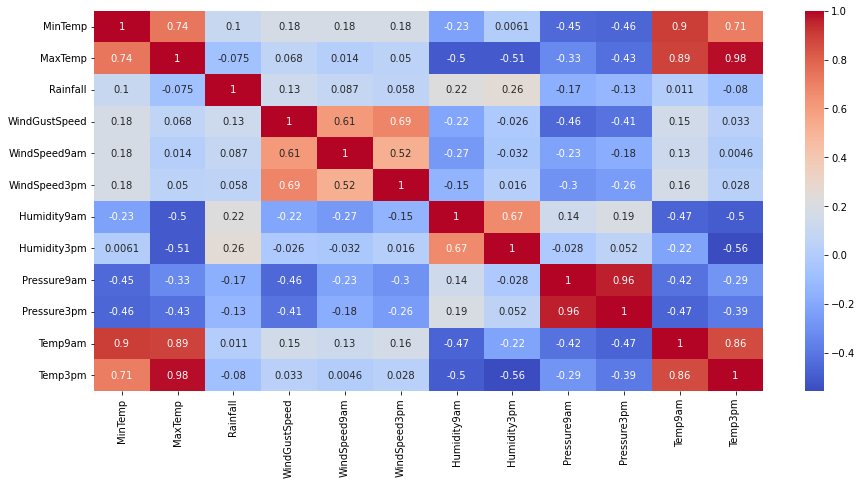

In [15]:
corr=df.corr()
fig, ax=plt.subplots(figsize=(15,7))
sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm")

# Encoding categorical values to numerical values

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Location']=le.fit_transform(df.Location)
df['WindGustDir']=le.fit_transform(df.WindGustDir)
df['WindDir9am']=le.fit_transform(df.WindDir9am)
df['WindDir3pm']=le.fit_transform(df.WindDir3pm)
df['RainToday']=le.fit_transform(df.RainToday)
df['RainTomorrow']=le.fit_transform(df.RainTomorrow)

In [18]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [19]:
x=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [24]:
print(x)

[[ 2.  13.4 22.9 ... 16.9 21.8  0. ]
 [ 2.   7.4 25.1 ... 17.2 24.3  0. ]
 [ 2.  12.9 25.7 ... 21.  23.2  0. ]
 ...
 [41.   5.4 26.9 ... 12.5 26.1  0. ]
 [41.   7.8 27.  ... 15.1 26.   0. ]
 [41.  14.9 20.  ... 15.  20.9  0. ]]


In [23]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    2
Name: RainTomorrow, Length: 145460, dtype: int32


# Data Cleaning

In [25]:
#from sklearn.impute import SimpleImputer
#imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent') #Cleaning the dataset
#x=imputer.fit_transform(x)
#y=imputer.fit_transform(y)

# Splitting the dataset into Training and Test Data

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
print(x_train)

[[27.  18.8 23.7 ... 21.4 22.2  0. ]
 [44.   9.3 24.  ... 14.3 23.2  0. ]
 [31.  10.9 22.2 ... 16.6 21.5  1. ]
 ...
 [39.  17.  29.8 ... 24.1 29.   0. ]
 [32.  11.9 22.  ... 17.1 19.7  1. ]
 [47.  12.  16.7 ... 14.7 16.4  0. ]]


In [30]:
print(y_train)

22926     1
80735     0
121764    0
139821    0
1867      1
         ..
41993     0
97639     0
95939     0
117952    0
43567     0
Name: RainTomorrow, Length: 116368, dtype: int32


# Training Models-LogisticRegression

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predictions=lr.predict(x_test)

C:\Users\Amit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[20979  1102     1]
 [ 3502  2864     0]
 [  555    89     0]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     22082
           1       0.71      0.45      0.55      6366
           2       0.00      0.00      0.00       644

    accuracy                           0.82     29092
   macro avg       0.51      0.47      0.48     29092
weighted avg       0.79      0.82      0.80     29092

0.8195723910353362


# Random Forest Classifier

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100,random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [35]:
classifier.score(x_train,y_train)

0.999888285439296

In [36]:
y_pred=classifier.predict(x_test)

In [37]:
print(y_pred)

[0 1 0 ... 0 0 0]


In [47]:
y_pred=le.inverse_transform(y_pred)

In [54]:
print(y_pred)

[['No']
 ['Yes']
 ['No']
 ...
 ['No']
 ['No']
 ['No']]


In [50]:
y_pred=y_pred.reshape(-1,1)

In [56]:
#y_test=le.inverse_transform(y_test)

In [58]:
y_test=y_test.reshape(-1,1)

In [64]:
print(y_test)

[['Yes']
 ['Yes']
 ['No']
 ...
 ['Yes']
 ['No']
 ['No']]


In [78]:
df1=np.concatenate((y_test,y_pred),axis=1)
df=pd.DataFrame(df1,columns=["RainonTomorrow","PredictionofRain"])

In [79]:
print(df1)

[['Yes' 'No']
 ['Yes' 'Yes']
 ['No' 'No']
 ...
 ['Yes' 'No']
 ['No' 'No']
 ['No' 'No']]


In [80]:
print(df)

      RainonTomorrow PredictionofRain
0                Yes               No
1                Yes              Yes
2                 No               No
3                 No              Yes
4                 No               No
...              ...              ...
29087             No              Yes
29088             No               No
29089            Yes               No
29090             No               No
29091             No               No

[29092 rows x 2 columns]


In [71]:
df.to_csv('prediction.csv') 

# Calculating Accuracy